In [1]:
from networks.adversarial_model import EncoderDecoder
import torch
import numpy as np
import scipy.io
import torch.nn as nn
from networks.gan import Generator, Generator256, Generator512
from nn_descent_gan import NAE, cost_func, get_tensor, outer, generate
import os
import matplotlib.pyplot as plt

In [36]:

X = scipy.io.loadmat('data/T.mat')['T']
C = scipy.io.loadmat('data/C.mat')['C']
W = scipy.io.loadmat('data/Om.mat')['Om']
S_tilde = scipy.io.loadmat('data/S_omega.mat')['S_omega']
S_true = scipy.io.loadmat('data/Sc.mat')['S_true']
Strue_raw = scipy.io.loadmat('data/Sc.mat')['S_true']
R = C.shape[1]
# # ans = run_descent(O_mat, T, S_tensor, C, C.shape[1])
# ans = inverse_gan(W, X, S_tilde, C, R, S_true)
# print(ans.shape)


In [27]:
ROOT = '/scratch/sagar/Projects/radio_map_deep_prior/deep_prior'
S_true = torch.load(os.path.join(ROOT, 'test_slf_comp'))
S_samp = torch.load(os.path.join(ROOT, 'test_slf_samp'))
S_tilde = S_samp[1]
W = S_samp[0]

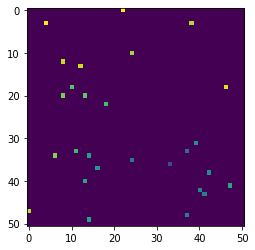

In [13]:
plt.imshow(S_samp[1].squeeze().numpy())

In [15]:
S_tilde.shape

torch.Size([51, 51])

In [5]:
from IPython.display import clear_output
from slf_dataset import plot_image_output
import time

loop_count = 500
z_dimension = 256
criterion = nn.MSELoss()

generator = Generator256()
GAN_PATH = '/home/sagar/Projects/radio_map_deep_prior/deep_prior/trained-models/gan/sngan7_256'
GAN_PATH_SERVER = '/scratch/sagar/Projects/radio_map_deep_prior/deep_prior/trained-models/gan/sngan7_256'
try:
    checkpoint = torch.load(GAN_PATH, map_location=torch.device('cpu'))
except:
    checkpoint = torch.load(GAN_PATH_SERVER, map_location=torch.device('cpu'))
    
generator.load_state_dict(checkpoint['g_model_state_dict'])
generator.eval()
generator = generator.to('cpu')


Z = torch.zeros((1,z_dimension), dtype=torch.float32)
# First select a good random vector
for r in range(1):
    z = torch.randn((1,z_dimension), dtype=torch.float32)
    min_criterion = 9999999
    print('starting opt')
    for i in range(400):
        temp = torch.randn((1,z_dimension), dtype=torch.float32)
        temp_out = generator(temp)
        
        temp_criterion = criterion((W*S_tilde), (W*temp_out))

        if  temp_criterion < min_criterion:
            z.data = temp.clone()
            min_criterion = temp_criterion
            print('min_first', min_criterion)

    for i in range(200):
        temp = 0.2*torch.randn((1,z_dimension), dtype=torch.float32) + z
        temp_out = generator(temp)

        temp_criterion = criterion((W*S_tilde), (W*temp_out))
        if  temp_criterion < min_criterion:
            z.data = temp.clone()
            min_criterion = temp_criterion
            print('min_second', min_criterion)

    z.requires_grad = True
    optimizer = torch.optim.Adam([z], lr=0.01)

    for i in range(loop_count):
        optimizer.zero_grad()

        gen_out = generator(z)
        loss = criterion((W*S_tilde), (W*gen_out))

        print(loss)
        loss.backward()
        optimizer.step()

    z = z.detach()
    

starting opt
min_first tensor(0.0012, grad_fn=<MseLossBackward>)
min_first tensor(0.0002, grad_fn=<MseLossBackward>)
min_first tensor(0.0002, grad_fn=<MseLossBackward>)
min_first tensor(0.0001, grad_fn=<MseLossBackward>)
min_first tensor(0.0001, grad_fn=<MseLossBackward>)
min_first tensor(0.0001, grad_fn=<MseLossBackward>)
min_first tensor(5.0566e-05, grad_fn=<MseLossBackward>)
min_second tensor(4.6850e-05, grad_fn=<MseLossBackward>)
min_second tensor(4.2447e-05, grad_fn=<MseLossBackward>)
min_second tensor(4.1284e-05, grad_fn=<MseLossBackward>)
min_second tensor(4.0509e-05, grad_fn=<MseLossBackward>)
min_second tensor(4.0053e-05, grad_fn=<MseLossBackward>)
min_second tensor(3.8536e-05, grad_fn=<MseLossBackward>)
min_second tensor(3.7229e-05, grad_fn=<MseLossBackward>)
min_second tensor(3.1838e-05, grad_fn=<MseLossBackward>)
min_second tensor(3.1705e-05, grad_fn=<MseLossBackward>)
min_second tensor(2.8682e-05, grad_fn=<MseLossBackward>)
min_second tensor(2.8028e-05, grad_fn=<MseLossBac

tensor(3.7854e-06, grad_fn=<MseLossBackward>)
tensor(3.7809e-06, grad_fn=<MseLossBackward>)
tensor(3.7438e-06, grad_fn=<MseLossBackward>)
tensor(3.7201e-06, grad_fn=<MseLossBackward>)
tensor(3.7061e-06, grad_fn=<MseLossBackward>)
tensor(3.6837e-06, grad_fn=<MseLossBackward>)
tensor(3.6494e-06, grad_fn=<MseLossBackward>)
tensor(3.6260e-06, grad_fn=<MseLossBackward>)
tensor(3.6135e-06, grad_fn=<MseLossBackward>)
tensor(3.5756e-06, grad_fn=<MseLossBackward>)
tensor(3.5665e-06, grad_fn=<MseLossBackward>)
tensor(3.5321e-06, grad_fn=<MseLossBackward>)
tensor(3.5126e-06, grad_fn=<MseLossBackward>)
tensor(3.4942e-06, grad_fn=<MseLossBackward>)
tensor(3.4699e-06, grad_fn=<MseLossBackward>)
tensor(3.4472e-06, grad_fn=<MseLossBackward>)
tensor(3.4324e-06, grad_fn=<MseLossBackward>)
tensor(3.4056e-06, grad_fn=<MseLossBackward>)
tensor(3.3887e-06, grad_fn=<MseLossBackward>)
tensor(3.3705e-06, grad_fn=<MseLossBackward>)
tensor(3.3490e-06, grad_fn=<MseLossBackward>)
tensor(3.3259e-06, grad_fn=<MseLos

tensor(1.7015e-06, grad_fn=<MseLossBackward>)
tensor(1.7002e-06, grad_fn=<MseLossBackward>)
tensor(1.6964e-06, grad_fn=<MseLossBackward>)
tensor(1.6924e-06, grad_fn=<MseLossBackward>)
tensor(1.6843e-06, grad_fn=<MseLossBackward>)
tensor(1.6861e-06, grad_fn=<MseLossBackward>)
tensor(1.6768e-06, grad_fn=<MseLossBackward>)
tensor(1.6739e-06, grad_fn=<MseLossBackward>)
tensor(1.6681e-06, grad_fn=<MseLossBackward>)
tensor(1.6641e-06, grad_fn=<MseLossBackward>)
tensor(1.6630e-06, grad_fn=<MseLossBackward>)
tensor(1.6547e-06, grad_fn=<MseLossBackward>)
tensor(1.6589e-06, grad_fn=<MseLossBackward>)
tensor(1.6500e-06, grad_fn=<MseLossBackward>)
tensor(1.6466e-06, grad_fn=<MseLossBackward>)
tensor(1.6413e-06, grad_fn=<MseLossBackward>)
tensor(1.6378e-06, grad_fn=<MseLossBackward>)
tensor(1.6373e-06, grad_fn=<MseLossBackward>)
tensor(1.6300e-06, grad_fn=<MseLossBackward>)
tensor(1.6315e-06, grad_fn=<MseLossBackward>)
tensor(1.6201e-06, grad_fn=<MseLossBackward>)
tensor(1.6221e-06, grad_fn=<MseLos

In [15]:
gen_out = generator(z)

In [16]:
criterion(gen_out, S_true)

tensor(0.0080, grad_fn=<MseLossBackward>)

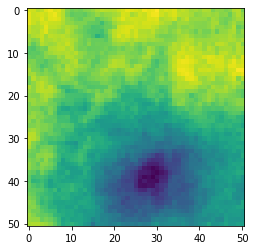

In [19]:
plt.imshow(gen_out.detach().squeeze().numpy())

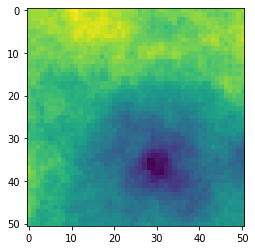

In [20]:
plt.imshow(S_true.squeeze().numpy())

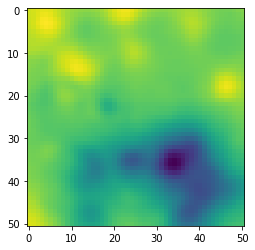

In [21]:
plt.imshow(ae_out.detach().squeeze().numpy())

In [4]:
from nn_descent_ae import model, model_log
ae_out = model(S_tilde, W, R)
ae_log_out = model_log(S_tilde, W,R)

In [7]:
from nn_descent_ae import slf_network_log

In [11]:
S_samp = S_samp.unsqueeze(dim=0)

In [12]:
ae_out = slf_network_log(S_samp)

In [14]:
criterion(S_true, ae_out)

/scratch/sagar/Projects/radio_map_deep_prior/venv/lib/python3.6/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([1, 1, 51, 51])) that is different to the input size (torch.Size([1, 51, 51])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.0171, grad_fn=<MseLossBackward>)

In [5]:
NAE(ae_out, Strue_raw)

0.4379223952581256

In [37]:
from IPython.display import clear_output
from slf_dataset import plot_image_output
import time

loop_count = 500
z_dimension = 256
criterion = nn.MSELoss()
print_out = False

generator = Generator256()
GAN_PATH = '/home/sagar/Projects/radio_map_deep_prior/deep_prior/trained-models/gan/sngan7_256'
GAN_PATH_SERVER = '/scratch/sagar/Projects/radio_map_deep_prior/deep_prior/trained-models/gan/sngan7_256'
try:
    checkpoint = torch.load(GAN_PATH, map_location=torch.device('cpu'))
except:
    checkpoint = torch.load(GAN_PATH_SERVER, map_location=torch.device('cpu'))
    
generator.load_state_dict(checkpoint['g_model_state_dict'])
generator.eval()
generator = generator.to('cpu')


# Prepare data
W = torch.from_numpy(W).type(torch.float32)
X = torch.from_numpy(X).type(torch.float32)
S_tilde = torch.from_numpy(S_tilde).type(torch.float32)
S_true = torch.from_numpy(S_true).type(torch.float32)

C = torch.from_numpy(C).type(torch.float32)
R = int(R)


K = X.shape[2]

X = X.permute(2,0,1)
C = C.permute(1,0)

S = S_true.permute(2,0,1)
S_true = S_true.permute(2,0,1)

S_true[S_true<0] = 0
S_true = torch.log(S_true.unsqueeze(dim=1) + 1e-16)
S_true[S_true<-30] = 0

S_tilde = S_tilde.permute(2,0,1)
S_tilde[S_tilde<0] = 0
S_tilde = torch.log(S_tilde.unsqueeze(dim=1)+1e-16)
S_tilde[S_tilde<-30] = 0

normalizer = []
for i in range(R):
    normalizer.append(S_true[i].min().item())
    S_tilde[i] = S_tilde[i]/S_true[i].min()
    S_true[i] = S_true[i]/S_true[i].min()

# save normalization
a = torch.ones((R,1,51,51), dtype=torch.float32)
for i in range(R):
    a[i] = a[i]*normalizer[i]

# S_tilde = S_tilde
    
    

W = W.unsqueeze(dim=0)
W = W.unsqueeze(dim=0)
Wr = W.repeat(R,1,1,1)
Wx = W.repeat(K,1,1,1)

S_tilde = S_true*Wr


Wr[Wr<0.5] = 0
Wr[Wr>=0.5] = 1
Wx[Wx<0.5] = 0
Wx[Wx>=0.5] = 1
Wx = Wx.squeeze()
print(Wx.shape)
W = W.squeeze(dim=0)
print("shape of W is {}".format(W.shape))
Z = torch.zeros((1,z_dimension), dtype=torch.float32)
# First select a good random vector
for r in range(R):
    z = torch.randn((1,z_dimension), dtype=torch.float32)
    min_criterion = 9999999
    print('starting opt')
    for i in range(400):
        temp = torch.randn((1,z_dimension), dtype=torch.float32)
        temp_out = generator(temp)
        
        temp_criterion = criterion((W*S_tilde[r]), (W*temp_out))

        if  temp_criterion < min_criterion:
            z.data = temp.clone()
            min_criterion = temp_criterion
            print('min_first', min_criterion)

    for i in range(200):
        temp = 0.2*torch.randn((1,z_dimension), dtype=torch.float32) + z
        temp_out = generator(temp)

        temp_criterion = criterion((W*S_tilde[r]), (W*temp_out))
        if  temp_criterion < min_criterion:
            z.data = temp.clone()
            min_criterion = temp_criterion
            print('min_second', min_criterion)

    z.requires_grad = True
    optimizer = torch.optim.Adam([z], lr=0.1)

    for i in range(loop_count):
        optimizer.zero_grad()

        gen_out = generator(z)
#         gen_out = torch.exp(gen_out*a)
        loss = criterion((W*S_tilde[r]), (W*gen_out))

        print(loss)
        loss.backward()
        optimizer.step()
        if print_out:
            clear_output(wait=True)
            print(r)
            plot_image_output(gen_out)
            plt.show()
#             time.sleep(0.1)

    z = z.detach()
    Z = torch.cat((Z,z), dim=0)
# z = z.detach().numpy()
Z = Z[1:].numpy()
gen_out = generate(Z, a)

print('shape of Z is {}'.format(Z.shape))
# gen_out = gen_out[:,0,:,:]
# gen_out = gen_out.permute(1,2,0)
# gen_out = gen_out.detach().numpy()

# return z.copy(), gen_out.copy() 


torch.Size([64, 51, 51])
shape of W is torch.Size([1, 51, 51])
starting opt
min_first tensor(0.0069, grad_fn=<MseLossBackward>)
min_first tensor(0.0048, grad_fn=<MseLossBackward>)
min_first tensor(0.0037, grad_fn=<MseLossBackward>)
min_first tensor(0.0028, grad_fn=<MseLossBackward>)
min_first tensor(0.0012, grad_fn=<MseLossBackward>)
min_second tensor(0.0011, grad_fn=<MseLossBackward>)
min_second tensor(0.0011, grad_fn=<MseLossBackward>)
min_second tensor(0.0008, grad_fn=<MseLossBackward>)
min_second tensor(0.0007, grad_fn=<MseLossBackward>)
min_second tensor(0.0006, grad_fn=<MseLossBackward>)
min_second tensor(0.0006, grad_fn=<MseLossBackward>)
min_second tensor(0.0006, grad_fn=<MseLossBackward>)
min_second tensor(0.0006, grad_fn=<MseLossBackward>)
min_second tensor(0.0006, grad_fn=<MseLossBackward>)
min_second tensor(0.0005, grad_fn=<MseLossBackward>)
min_second tensor(0.0005, grad_fn=<MseLossBackward>)
min_second tensor(0.0005, grad_fn=<MseLossBackward>)
min_second tensor(0.0004, gr

tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBac

tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBac

tensor(0.0007, grad_fn=<MseLossBackward>)
tensor(0.0007, grad_fn=<MseLossBackward>)
tensor(0.0007, grad_fn=<MseLossBackward>)
tensor(0.0006, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBac

tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBac

tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBac

In [35]:
W.shape

torch.Size([1, 51, 51])

In [38]:
genn = generator(z)

In [39]:
criterion(genn, S_true)

tensor(0.0435, grad_fn=<MseLossBackward>)

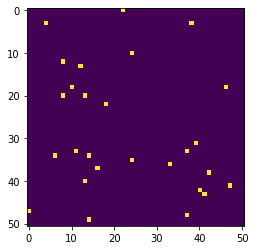

In [23]:
plt.imshow(W.numpy())

In [11]:
NAE(gen_out, Strue_raw)

1.4391869349976854

In [22]:
r=1
import matplotlib.pyplot as plt

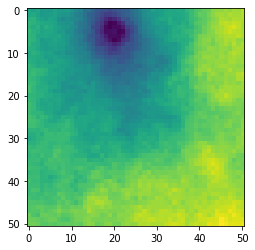

In [23]:
plt.imshow(S_true[r,0])

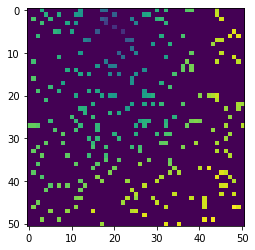

In [24]:
plt.imshow(S_tilde[r,0,:,:])

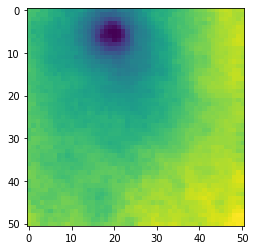

In [25]:
plt.imshow(-np.log(gen_out[:,:,r]))

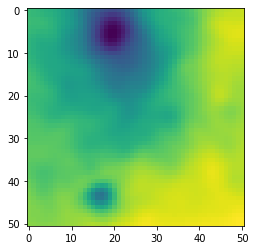

In [26]:
plt.imshow(-np.log(ae_log_out[:,:,r]))

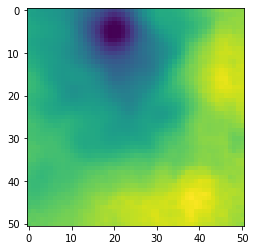

In [27]:
plt.imshow(-np.log(ae_out[:,:,r]))

In [28]:
S_true = scipy.io.loadmat('data/Sc.mat')['S_true']

In [12]:
Sr = gen_out
S = S_true

In [15]:
Sr.shape

(51, 51, 2)

In [35]:
Sr = ae_out